In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance

In [2]:
new_moviesData = pd.read_csv("movie_data_final")
new_moviesData

,Rank,Genre,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,0,264,94,2014,121,8.1,757074,333.13,76.0
1,2,1,514,389,2012,124,7.0,485820,126.46,65.0
2,3,7,388,220,2016,117,7.3,157606,138.12,62.0
3,4,2,104,346,2016,108,7.2,60545,270.32,59.0
4,5,0,135,510,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
829,994,0,484,367,2010,97,5.9,140900,60.13,37.0
830,995,4,459,485,2012,88,6.7,164088,54.72,48.0
831,997,7,175,304,2007,94,5.5,73152,17.54,46.0
832,998,6,322,424,2008,98,6.2,70699,58.01,50.0


Multiple Linear Regression based off hypothesis

In [3]:
X = new_moviesData[["Metascore",'Runtime_Minutes', "Genre", 'Votes', 'Actors', 'Rank', 'Director', 'Actors', 'Revenue_Millions']]
y = new_moviesData["Rating"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

In [7]:
y_pred = linear_model.predict(X_test_scaled)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)


Mean Squared Error (MSE): 0.2998526244308384
R-squared (R2): 0.6036142482733811
Coefficients: [ 0.4574389   0.10021004  0.02407189  0.32838037  0.00699945 -0.03294444
 -0.00200113  0.00699945 -0.09475519]
Intercept: 6.825187406296853


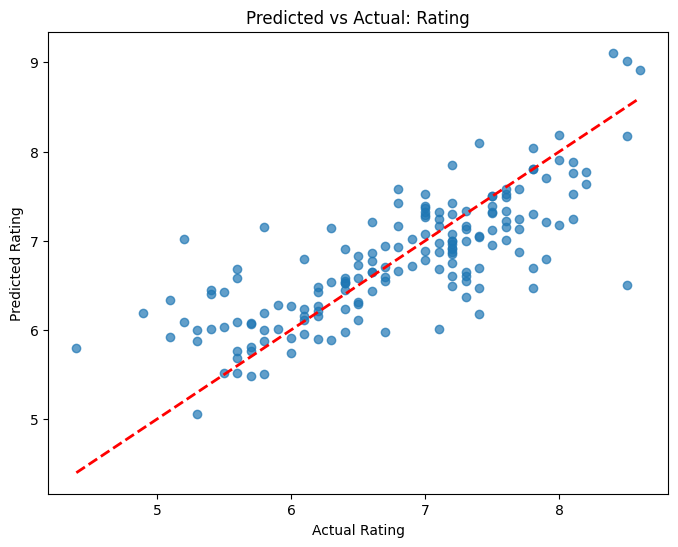

In [9]:
#https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
#this is a summmary of how to use one of these charts
#for the plot part, that is how you create the red line

def plot_predicted_vs_actual(y_test, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Predicted vs Actual: {title}")
    plt.show()

plot_predicted_vs_actual(y_test, y_pred, "Rating")

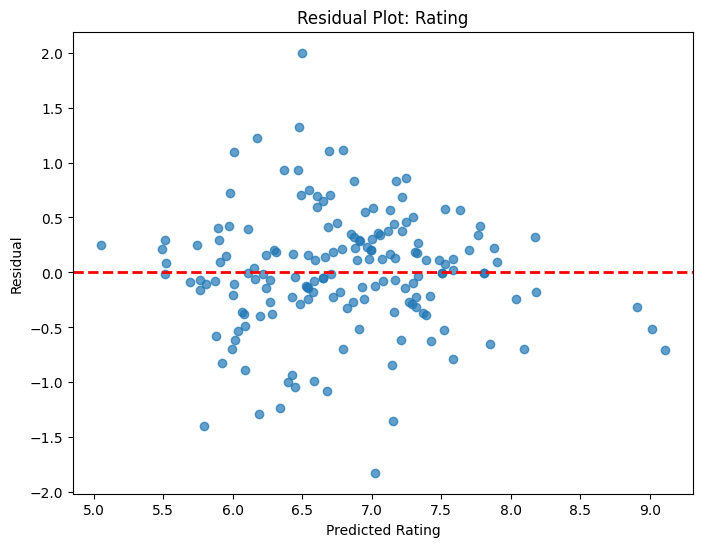

In [10]:
#https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/
##https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/
#https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a
#how to create a residual plot

def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='r', linestyle='--', linewidth=2)
    plt.xlabel("Predicted Rating")
    plt.ylabel("Residual")
    plt.title(f"Residual Plot: {title}")
    plt.show()

plot_residuals(y_test, y_pred, "Rating")

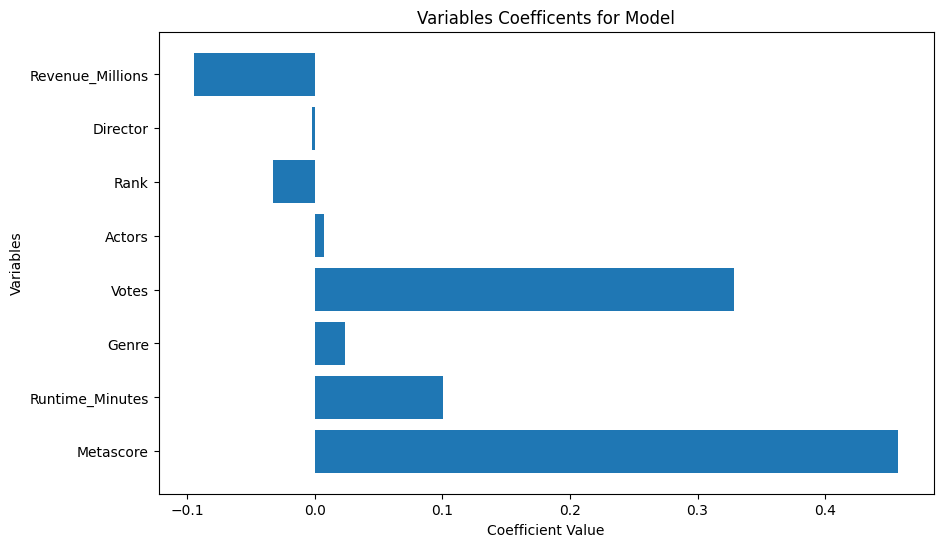

In [11]:
##https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names
#how to create a feature importance graph
def plot_feature_importance(model, feature_names, title="Variables Coefficents for Model"):
    coefficients = model.coef_  
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients)
    plt.title(title)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Variables')
    plt.show()

plot_feature_importance(model=linear_model, feature_names=X_train.columns, title="Variables Coefficents for Model")


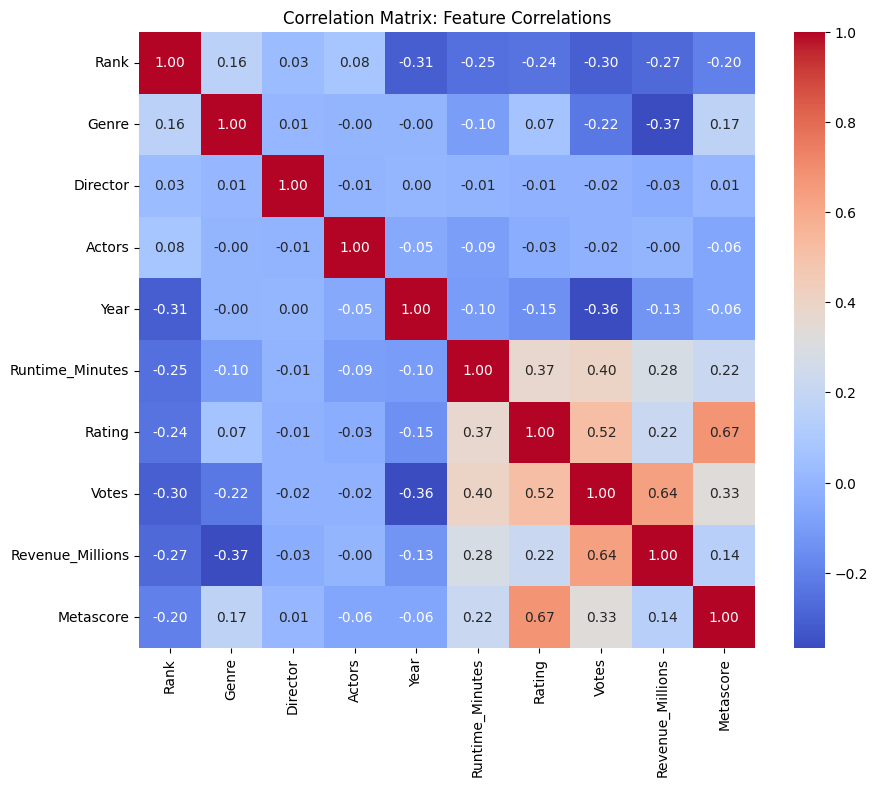

In [12]:
def plot_correlation_matrix(data, title, cmap='coolwarm'):
    correlation_matrix = new_moviesData.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, cbar=True, square=True)
    plt.title(f"Correlation Matrix: {title}")
    plt.show()

plot_correlation_matrix(new_moviesData, "Feature Correlations")



KNN

In [13]:
#https://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy
#https://saturncloud.io/blog/binning-a-column-with-python-pandas/
#this is how to bin data for knn
#for the bins, I just made them equal in distance, rather than give them a select value for the bin
bins = 5
new_moviesData['rating_bins'] = pd.cut(new_moviesData['Rating'], bins=bins)
labels = [f"{interval.left:.2f}-{interval.right:.2f}" for interval in new_moviesData['rating_bins'].cat.categories]
new_moviesData['rating_bins'] = pd.cut(new_moviesData['Rating'], bins=bins, labels=labels, include_lowest=True)

print(new_moviesData[['Rating', 'rating_bins']].head())

print(new_moviesData['rating_bins'].value_counts(sort=False))

   Rating rating_bins
0     8.1   7.58-9.00
1     7.0   6.16-7.58
2     7.3   6.16-7.58
3     7.2   6.16-7.58
4     6.2   6.16-7.58
rating_bins
1.89-3.32      2
3.32-4.74     12
4.74-6.16    154
6.16-7.58    487
7.58-9.00    179
Name: count, dtype: int64


In [14]:
X = new_moviesData.drop(columns=['Rating', 'rating_bins']) 
y = new_moviesData['rating_bins'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   3.32-4.74       0.00      0.00      0.00         3
   4.74-6.16       0.56      0.25      0.35        36
   6.16-7.58       0.65      0.82      0.72        92
   7.58-9.00       0.71      0.67      0.69        36

    accuracy                           0.65       167
   macro avg       0.48      0.43      0.44       167
weighted avg       0.63      0.65      0.62       167

Accuracy Score:
0.6467065868263473


In [18]:
print(y_test.size)
print(y_pred.size)

167
167


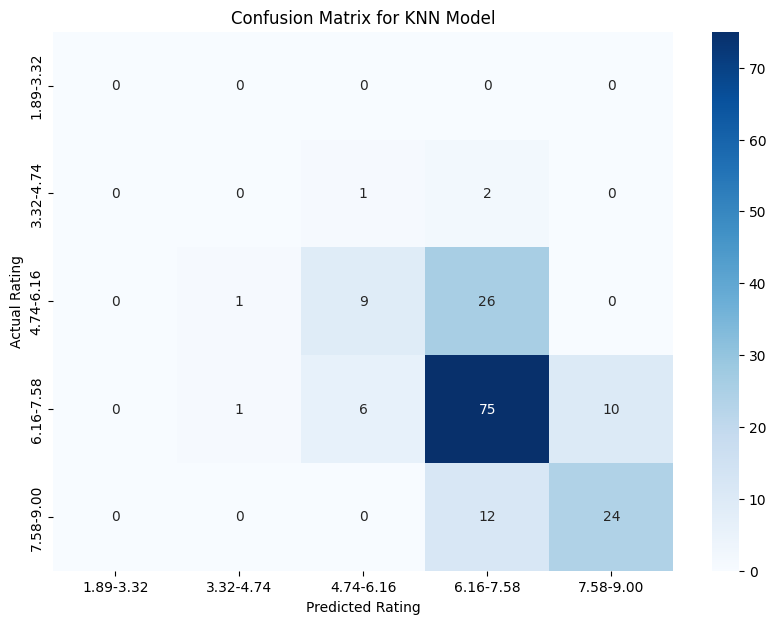

In [19]:
def plot_confusion_matrix(y_test, y_pred, classes):
    conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Rating")
    plt.ylabel("Actual Rating")
    plt.title("Confusion Matrix for KNN Model")
    plt.show()
plot_confusion_matrix(y_test, y_pred, classes=knn_model.classes_)



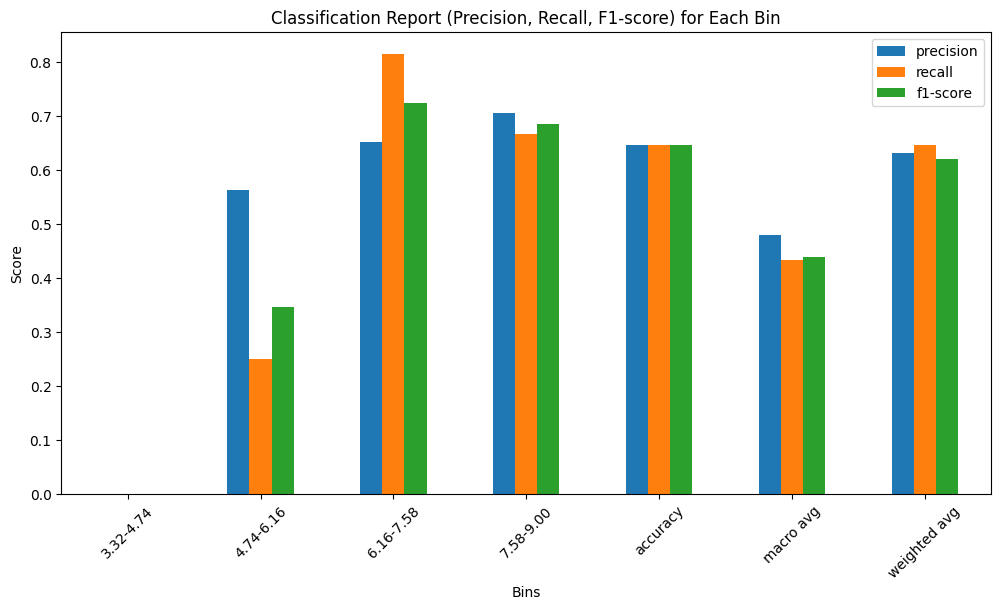

In [20]:
#https://stackoverflow.com/questions/72791813/how-to-generate-sklearn-classification-report-for-multiclass-multioutput-data
#https://www.geeksforgeeks.org/python-numpy-numpy-transpose/
#transpose fucntion and what it is used for
#how to create a classification report
#also we need to make the report a pandas dataframe in order to use the recall, percision, and f1-score, otherwise we would need to manually input it for each dataframe
#also we need to store the report in a Pandas dataframe to use the dataframe's built-in plot method
def plot_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title("Classification Report (Precision, Recall, F1-score) for Each Bin")
    plt.ylabel("Score")
    plt.xlabel("Bins")
    plt.xticks(rotation=45)
    plt.show()

plot_classification_report(y_test, y_pred)



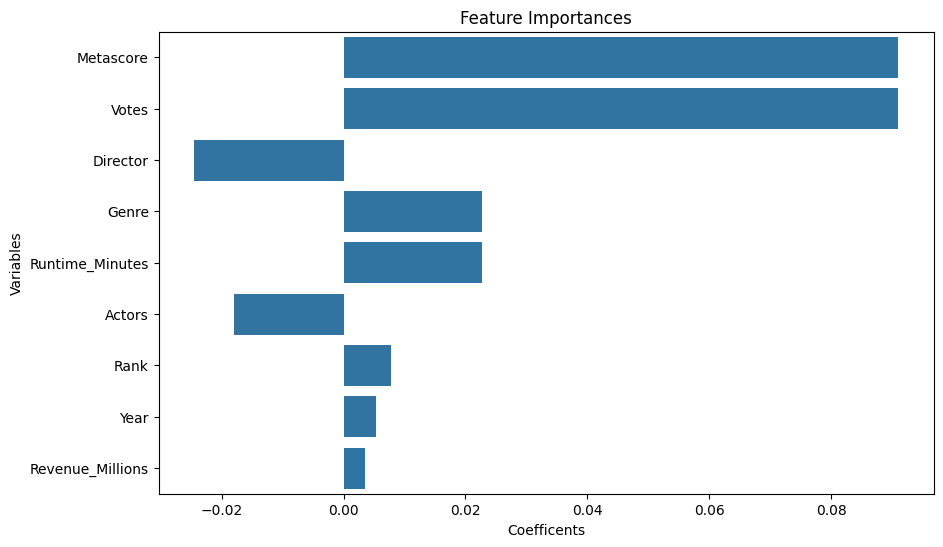

In [21]:
#https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names
#how to create a feature importance graph
#doing a similar thing here we can create another dataframe for feature and importance, making it easier to recall the value for the graph rather than manually input the name.
#also we need to store the report in a Pandas dataframe to use the dataframe's built-in plot method
def plot_feature_importances(model, X_test, y_test, feature_names, title="Feature Importances"):
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=22)
    feature_importances = pd.Series(perm_importance.importances_mean, index=feature_names).sort_values(ascending=False,key=lambda v: v.abs())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title(title)
    plt.xlabel("Coefficents")
    plt.ylabel("Variables")
    plt.show()

plot_feature_importances(knn_model, X_test_scaled, y_test, X.columns)
